In [7]:
using CSV
using DataFrames

In [8]:
#Preprocesando los datos
dataBitcoin = CSV.read("Bitcoin.csv",DataFrame);
dataBitcoin.Price .= replace.(dataBitcoin.Price,"," => "");
dataBitcoin.PriceFloat = parse.(Float64, dataBitcoin.Price);

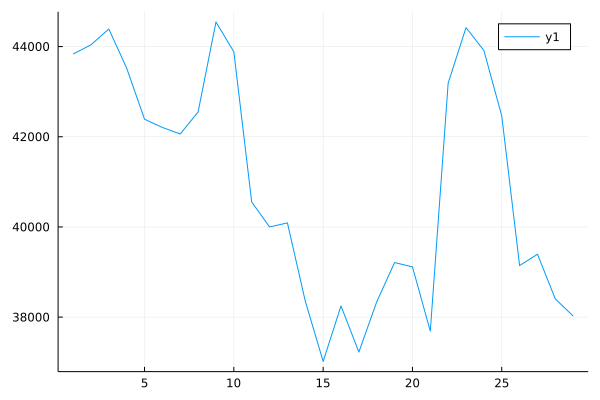

In [22]:
using Plots
plot(dataBitcoin.PriceFloat)

In [9]:
N = size(dataBitcoin.PriceFloat,1);
x = Array((1:N));
y = Array(dataBitcoin.PriceFloat);

In [10]:
using LsqFit

In [11]:
p_0 = [0.5,0.5]
model(t,p) = p[1] * exp.(-p[2]*t)
T1rec(x_, p) = p[1] * (1 - exp.(-x_/p[2]) )

T1rec (generic function with 1 method)

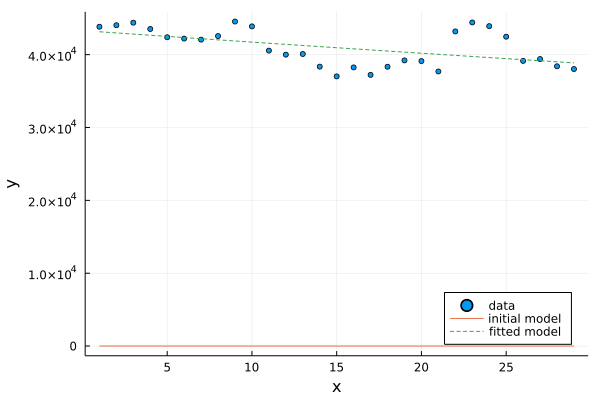

In [21]:
nlin_fit(model,x,y,p_0)

In [15]:
function nlin_fit(model,x,y,p_0)
    nlinfit = curve_fit(model,x,y,p_0)
    pfit = nlinfit.param
    xlin = range(x[1],x[end],length = 100)
    
    scatter(x,y,markersize=3,legend=:bottomright, label="data")
    plot!(xlin,model(xlin,[p_0[1],p_0[2]]), label="initial model")
    plot!(xlin,model(xlin,[pfit[1],pfit[2]]), linestyle=:dash,label="fitted model",dpi=200)
    
    xaxis!("x")
    yaxis!("y")
end

nlin_fit (generic function with 1 method)

In [12]:
using LinearAlgebra
using SparseArrays

In [13]:
f(theta) = theta[1] * exp.(theta[2]*x) .*
cos.(theta[3] * x .+ theta[4]) - y;

In [14]:
Df(theta) = hcat(
exp.(theta[2]*x) .* cos.(theta[3] * x .+ theta[4]),
theta[1] * ( x .* exp.(theta[2]*x) .*
cos.(theta[3] * x .+ theta[4])),
-theta[1] * ( exp.(theta[2]*x) .* x .*
sin.(theta[3] * x .+ theta[4])),
-theta[1] * ( exp.(theta[2]*x) .*
sin.(theta[3] * x .+ theta[4])) );

In [15]:
theta1 = [1, 0, 1, 0];

In [16]:
function levenberg_marquardt(f, Df, x1, lambda1; kmax=100, tol=1e-6)
    n = length(x1)
    x = x1
    lambda = lambda1
    objectives = zeros(0,1)
    residuals = zeros(0,1)
    for k = 1:kmax
        fk = f(x)
        Dfk = Df(x)
        objectives = [objectives; norm(fk)^2]
        residuals = [residuals; norm(2*Dfk'*fk)]
        if norm(2*Dfk'*fk) < tol
            break
        end;
        xt = x - [ Dfk; sqrt(lambda)*I(n) ] \ [ fk; zeros(n) ]
        if norm(f(xt)) < norm(fk)
            lambda = 0.8*lambda
            x = xt
        else
            lambda = 2.0*lambda
        end
    end
    return x, Dict([ ("objectives", objectives),
        ("residuals", residuals)])
end

levenberg_marquardt (generic function with 1 method)

In [17]:
theta, history = levenberg_marquardt(f, Df, theta1, 1.0)

([-1587.8027065398949, -180.79450448862738, 357.5011309324512, -7922.594131662477], Dict("objectives" => [4.886729417073628e10; 4.8867165864119995e10;;], "residuals" => [2.3779225047614183e6; 4.26231466147994e-71;;]))

In [23]:
xd = range(0, 20, 500);

In [24]:
y=theta[1]*exp.(theta[2]*xd) .* cos.(theta[3]*xd .+ theta[4]);

In [25]:
y

500-element Vector{Float64}:
 -1391.4894134545875
     0.7240027081468094
     0.0005105534884702037
    -5.064438751020203e-7
    -1.219758787240112e-10
     2.9043883792928887e-13
    -1.6845632000953186e-17
    -1.4300633623414206e-19
     4.7371095232322425e-23
     5.980821313361961e-26
    -4.0302027676001803e-29
    -1.945198937102731e-32
     2.5757531194665656e-35
     ⋮
    -0.0
    -0.0
     0.0
    -0.0
    -0.0
     0.0
     0.0
    -0.0
    -0.0
     0.0
    -0.0
    -0.0

6.166647987649181e-92

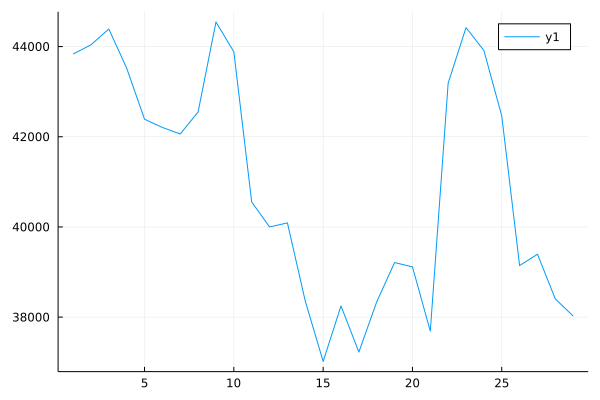

In [34]:
plot(dataBitcoin.PriceFloat)